## March 4 - Learning



In [1]:
from learning import *
from notebook import *

## Iris in Wonderland


<img src="images/Iris_setosa.jpg" alt="setosa">
<p></p>
Setosa
<p></p>
<img src="images/Iris_versicolor.jpg" alt="versicolor">
<p></p>
Versicolor
<p></p>
<img src="images/Iris_virginia.jpg" alt="viginia">
<p></p>
Virginia
<p></p>
<a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Fisher's Iris data set</a>
        

## MACHINE LEARNING OVERVIEW

In this notebook, we learn about agents that can improve their behavior through diligent study of their own experiences.

An agent is **learning** if it improves its performance on future tasks after making observations about the world.

There are three types of feedback that determine the three main types of learning:

* **Supervised Learning**:

In Supervised Learning the agent observes some example input-output pairs and learns a function that maps from input to output.

**Example**: Let's think of an agent to classify images containing cats or dogs. If we provide an image containing a cat or a dog, this agent should output a string "cat" or "dog" for that particular image. To teach this agent, we will give a lot of input-output pairs like {cat image-"cat"}, {dog image-"dog"} to the agent. The agent then learns a function that maps from an input image to one of those strings.

* **Unsupervised Learning**:

In Unsupervised Learning the agent learns patterns in the input even though no explicit feedback is supplied. The most common type is **clustering**: detecting potential useful clusters of input examples.

**Example**: A taxi agent would develop a concept of *good traffic days* and *bad traffic days* without ever being given labeled examples.

* **Reinforcement Learning**:

In Reinforcement Learning the agent learns from a series of reinforcements—rewards or punishments.

**Example**: Let's talk about an agent to play the popular Atari game—[Pong](http://www.ponggame.org). We will reward a point for every correct move and deduct a point for every wrong move from the agent. Eventually, the agent will figure out its actions prior to reinforcement were most responsible for it.

## DATASETS

For the following tutorials we will use a range of datasets, to better showcase the strengths and weaknesses of the algorithms. The datasests are the following:

* [Fisher's Iris](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/iris.csv): Each item represents a flower, with four measurements: the length and the width of the sepals and petals. Each item/flower is categorized into one of three species: Setosa, Versicolor and Virginica.

* [Zoo](https://github.com/aimacode/aima-data/blob/a21fc108f52ad551344e947b0eb97df82f8d2b2b/zoo.csv): The dataset holds different animals and their classification as "mammal", "fish", etc. The new animal we want to classify has the following measurements: 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1 (don't concern yourself with what the measurements mean).

To make using the datasets easier, we have written a class, `DataSet`, in `learning.py`. The tutorials found here make use of this class.

Let's have a look at how it works before we get started with the algorithms.

### Intro

A lot of the datasets we will work with are .csv files (although other formats are supported too). We have a collection of sample datasets ready to use [on aima-data](https://github.com/aimacode/aima-data/tree/a21fc108f52ad551344e947b0eb97df82f8d2b2b). Two examples are the datasets mentioned above (*iris.csv* and *zoo.csv*). You can find plenty datasets online, and a good repository of such datasets is [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.html).

In such files, each line corresponds to one item/measurement. Each individual value in a line represents a *feature* and usually there is a value denoting the *class* of the item.

You can find the code for the dataset here:

In [3]:
psource(DataSet)

### Class Attributes

* **examples**: Holds the items of the dataset. Each item is a list of values.

* **attrs**: The indexes of the features (by default in the range of [0,f), where *f* is the number of features). For example, `item[i]` returns the feature at index *i* of *item*.

* **attrnames**: An optional list with attribute names. For example, `item[s]`, where *s* is a feature name, returns the feature of name *s* in *item*.

* **target**: The attribute a learning algorithm will try to predict. By default the last attribute.

* **inputs**: This is the list of attributes without the target.

* **values**: A list of lists which holds the set of possible values for the corresponding attribute/feature. If initially `None`, it gets computed (by the function `setproblem`) from the examples.

* **distance**: The distance function used in the learner to calculate the distance between two items. By default `mean_boolean_error`.

* **name**: Name of the dataset.

* **source**: The source of the dataset (url or other). Not used in the code.

* **exclude**: A list of indexes to exclude from `inputs`. The list can include either attribute indexes (attrs) or names (attrnames).

### Class Helper Functions

These functions help modify a `DataSet` object to your needs.

* **sanitize**: Takes as input an example and returns it with non-input (target) attributes replaced by `None`. Useful for testing. Keep in mind that the example given is not itself sanitized, but instead a sanitized copy is returned.

* **classes_to_numbers**: Maps the class names of a dataset to numbers. If the class names are not given, they are computed from the dataset values. Useful for classifiers that return a numerical value instead of a string.

* **remove_examples**: Removes examples containing a given value. Useful for removing examples with missing values, or for removing classes (needed for binary classifiers).

### Importing a Dataset

#### Importing from aima-data

Datasets uploaded on aima-data can be imported with the following line:

In [4]:
iris = DataSet(name="iris")

In [5]:
iris.examples

[[5.1, 3.5, 1.4, 0.2, 'setosa'],
 [4.9, 3.0, 1.4, 0.2, 'setosa'],
 [4.7, 3.2, 1.3, 0.2, 'setosa'],
 [4.6, 3.1, 1.5, 0.2, 'setosa'],
 [5.0, 3.6, 1.4, 0.2, 'setosa'],
 [5.4, 3.9, 1.7, 0.4, 'setosa'],
 [4.6, 3.4, 1.4, 0.3, 'setosa'],
 [5.0, 3.4, 1.5, 0.2, 'setosa'],
 [4.4, 2.9, 1.4, 0.2, 'setosa'],
 [4.9, 3.1, 1.5, 0.1, 'setosa'],
 [5.4, 3.7, 1.5, 0.2, 'setosa'],
 [4.8, 3.4, 1.6, 0.2, 'setosa'],
 [4.8, 3.0, 1.4, 0.1, 'setosa'],
 [4.3, 3.0, 1.1, 0.1, 'setosa'],
 [5.8, 4.0, 1.2, 0.2, 'setosa'],
 [5.7, 4.4, 1.5, 0.4, 'setosa'],
 [5.4, 3.9, 1.3, 0.4, 'setosa'],
 [5.1, 3.5, 1.4, 0.3, 'setosa'],
 [5.7, 3.8, 1.7, 0.3, 'setosa'],
 [5.1, 3.8, 1.5, 0.3, 'setosa'],
 [5.4, 3.4, 1.7, 0.2, 'setosa'],
 [5.1, 3.7, 1.5, 0.4, 'setosa'],
 [4.6, 3.6, 1.0, 0.2, 'setosa'],
 [5.1, 3.3, 1.7, 0.5, 'setosa'],
 [4.8, 3.4, 1.9, 0.2, 'setosa'],
 [5.0, 3.0, 1.6, 0.2, 'setosa'],
 [5.0, 3.4, 1.6, 0.4, 'setosa'],
 [5.2, 3.5, 1.5, 0.2, 'setosa'],
 [5.2, 3.4, 1.4, 0.2, 'setosa'],
 [4.7, 3.2, 1.6, 0.2, 'setosa'],
 [4.8, 3.1

In [6]:
len(iris.examples)

150

values is a list of lists of the possible values for each attribute, including the targets

In [11]:
iris.values

[[4.7,
  5.5,
  5.0,
  4.9,
  5.1,
  4.6,
  5.4,
  4.4,
  4.8,
  4.3,
  5.8,
  7.0,
  7.1,
  4.5,
  5.9,
  5.6,
  6.9,
  6.5,
  6.4,
  6.6,
  6.0,
  6.1,
  7.6,
  7.4,
  7.9,
  5.7,
  5.3,
  5.2,
  6.3,
  6.7,
  6.2,
  6.8,
  7.3,
  7.2,
  7.7],
 [2.9,
  3.0,
  3.5,
  3.2,
  3.6,
  3.1,
  3.9,
  3.4,
  3.7,
  4.0,
  4.4,
  4.1,
  2.0,
  2.5,
  2.6,
  2.3,
  2.8,
  2.7,
  2.2,
  3.8,
  3.3,
  4.2,
  2.4],
 [1.7,
  1.4,
  1.6,
  1.3,
  1.5,
  1.1,
  1.2,
  1.0,
  1.9,
  4.7,
  4.5,
  4.9,
  4.0,
  5.0,
  6.0,
  3.5,
  3.0,
  4.6,
  4.4,
  4.1,
  5.1,
  5.9,
  5.6,
  5.5,
  5.4,
  6.6,
  6.1,
  6.9,
  6.4,
  3.6,
  3.3,
  3.8,
  3.7,
  4.2,
  4.8,
  4.3,
  5.8,
  5.3,
  5.7,
  5.2,
  6.3,
  6.7,
  3.9],
 [0.2,
  0.4,
  0.3,
  0.5,
  0.6,
  1.4,
  1.5,
  1.3,
  1.6,
  1.0,
  1.1,
  2.5,
  2.0,
  2.1,
  1.2,
  1.7,
  0.1,
  2.2,
  2.3,
  1.8,
  1.9,
  2.4],
 ['versicolor', 'setosa', 'virginica']]

In [12]:
len(iris.values)

5

In [19]:
list(map(len,iris.values))

[35, 23, 43, 22, 3]

In [21]:
iris.values[4]

['versicolor', 'setosa', 'virginica']

In [22]:
iris.distance

<function learning.mean_boolean_error(X, Y)>

In [26]:
dir(iris)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_example',
 'attrnames',
 'attrnum',
 'attrs',
 'check_example',
 'check_me',
 'classes_to_numbers',
 'distance',
 'examples',
 'find_means_and_deviations',
 'got_values_flag',
 'inputs',
 'name',
 'remove_examples',
 'sanitize',
 'setproblem',
 'source',
 'split_values_by_classes',
 'target',
 'update_values',
 'values']

In [27]:
print(iris.examples[0])
print(iris.inputs)

[5.1, 3.5, 1.4, 0.2, 'setosa']
[0, 1, 2, 3]


Which correctly prints the first line in the csv file and the list of attribute indexes.

When importing a dataset, we can specify to exclude an attribute (for example, at index 1) by setting the parameter `exclude` to the attribute index or name.

In [28]:
iris2 = DataSet(name="iris",exclude=[1])
print(iris2.inputs)

[0, 2, 3]


### Attributes

Here we showcase the attributes.

First we will print the first three items/examples in the dataset.

In [30]:
print(iris.examples[:3])

[[5.1, 3.5, 1.4, 0.2, 'setosa'], [4.9, 3.0, 1.4, 0.2, 'setosa'], [4.7, 3.2, 1.3, 0.2, 'setosa']]


Then we will print `attrs`, `attrnames`, `target`, `input`. Notice how `attrs` holds values in [0,4], but since the fourth attribute is the target, `inputs` holds values in [0,3].

In [31]:
print("attrs:", iris.attrs)
print("attrnames (by default same as attrs):", iris.attrnames)
print("target:", iris.target)
print("inputs:", iris.inputs)

attrs: [0, 1, 2, 3, 4]
attrnames (by default same as attrs): [0, 1, 2, 3, 4]
target: 4
inputs: [0, 1, 2, 3]


Now we will print all the possible values for the first feature/attribute.

In [32]:
print(iris.values[0])

[4.7, 5.5, 5.0, 4.9, 5.1, 4.6, 5.4, 4.4, 4.8, 4.3, 5.8, 7.0, 7.1, 4.5, 5.9, 5.6, 6.9, 6.5, 6.4, 6.6, 6.0, 6.1, 7.6, 7.4, 7.9, 5.7, 5.3, 5.2, 6.3, 6.7, 6.2, 6.8, 7.3, 7.2, 7.7]


Finally we will print the dataset's name and source. Keep in mind that we have not set a source for the dataset, so in this case it is empty.

In [33]:
print("name:", iris.name)
print("source:", iris.source)

name: iris
source: 


A useful combination of the above is `dataset.values[dataset.target]` which returns the possible values of the target. For classification problems, this will return all the possible classes. Let's try it:

In [34]:
print(iris.values[iris.target])

['versicolor', 'setosa', 'virginica']


### Helper Functions

We will now take a look at the auxiliary functions found in the class.

First we will take a look at the `sanitize` function, which sets the non-input values of the given example to `None`.

In this case we want to hide the class of the first example, so we will sanitize it.

Note that the function doesn't actually change the given example; it returns a sanitized *copy* of it.

In [35]:
print("Sanitized:",iris.sanitize(iris.examples[0]))
print("Original:",iris.examples[0])

Sanitized: [5.1, 3.5, 1.4, 0.2, None]
Original: [5.1, 3.5, 1.4, 0.2, 'setosa']


Currently the `iris` dataset has three classes, setosa, virginica and versicolor. We want though to convert it to a binary class dataset (a dataset with two classes). The class we want to remove is "virginica". To accomplish that we will utilize the helper function `remove_examples`.

In [36]:
iris2 = DataSet(name="iris")

iris2.remove_examples("virginica")
print(iris2.values[iris2.target])

['versicolor', 'setosa']


In [37]:
len(iris2.examples)

100

We also have `classes_to_numbers`. For a lot of the classifiers in the module (like the Neural Network), classes should have numerical values. With this function we map string class names to numbers.

In [38]:
print("Class of first example:",iris2.examples[0][iris2.target])
iris2.classes_to_numbers()
print("Class of first example:",iris2.examples[0][iris2.target])

Class of first example: setosa
Class of first example: 0


As you can see "setosa" was mapped to 0.

Finally, we take a look at `find_means_and_deviations`. It finds the means and standard deviations of the features for each class.

In [39]:
means, deviations = iris.find_means_and_deviations()

print("Setosa feature means:", means["setosa"])
print("Versicolor mean for first feature:", means["versicolor"][0])

print("Setosa feature deviations:", deviations["setosa"])
print("Virginica deviation for second feature:",deviations["virginica"][1])

Setosa feature means: [5.006, 3.418, 1.464, 0.244]
Versicolor mean for first feature: 5.936
Setosa feature deviations: [0.3524896872134513, 0.38102439795469095, 0.17351115943644546, 0.10720950308167838]
Virginica deviation for second feature: 0.32249663817263746


## IRIS VISUALIZATION

Since we will use the iris dataset extensively in this notebook, below we provide a visualization tool that helps in comprehending the dataset and thus how the algorithms work.

We plot the dataset in a 3D space using `matplotlib` and the function `show_iris` from `notebook.py`. The function takes as input three parameters, <i>i</i>, <i>j</i> and <i>k</i>, which are indices to the iris features, "Sepal Length", "Sepal Width", "Petal Length" and "Petal Width" (0 to 3). By default we show the first three features.

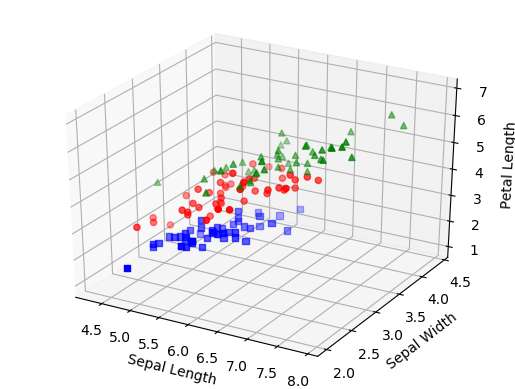

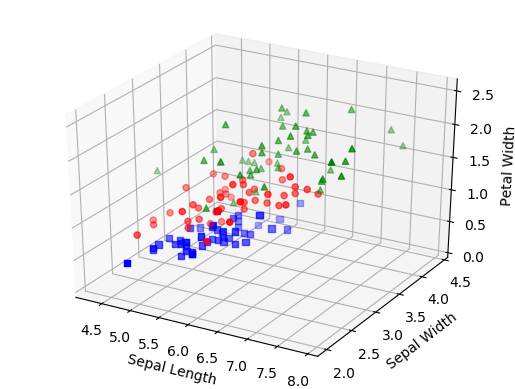

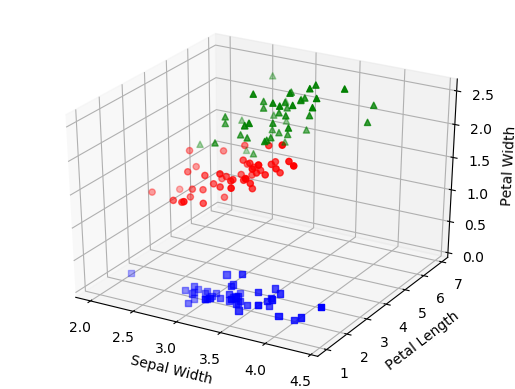

In [40]:
iris = DataSet(name="iris")

show_iris()
show_iris(0, 1, 3)
show_iris(1, 2, 3)

You can play around with the values to get a good look at the dataset.

## DISTANCE FUNCTIONS

In a lot of algorithms (like the *k-Nearest Neighbors* algorithm), there is a need to compare items, finding how *similar* or *close* they are. For that we have many different functions at our disposal. Below are the functions implemented in the <b>learning.py</b> module:

### Manhattan Distance (`manhattan_distance`)

One of the simplest distance functions. It calculates the difference between the coordinates/features of two items. To understand how it works, imagine a 2D grid with coordinates <i>x</i> and <i>y</i>. In that grid we have two items, at the squares positioned at `(1,2)` and `(3,4)`. The difference between their two coordinates is `3-1=2` and `4-2=2`. If we sum these up we get `4`. That means to get from `(1,2)` to `(3,4)` we need four moves; two to the right and two more up. The function works similarly for n-dimensional grids.

In [41]:
def manhattan_distance(X, Y):
    return sum([abs(x - y) for x, y in zip(X, Y)])


distance = manhattan_distance([1,2], [3,4])
print("Manhattan Distance between (1,2) and (3,4) is", distance)

Manhattan Distance between (1,2) and (3,4) is 4


### Euclidean Distance (`euclidean_distance`)

Probably the most popular distance function. It returns the square root of the sum of the squared differences between individual elements of two items.

In [42]:
def euclidean_distance(X, Y):
    return math.sqrt(sum([(x - y)**2 for x, y in zip(X,Y)]))


distance = euclidean_distance([1,2], [3,4])
print("Euclidean Distance between (1,2) and (3,4) is", distance)

Euclidean Distance between (1,2) and (3,4) is 2.8284271247461903


### Hamming Distance (`hamming_distance`)

This function counts the number of differences between single elements in two items. For example, if we have two binary strings "111" and "011" the function will return 1, since the two strings only differ at the first element. The function works the same way for non-binary strings too.

In [43]:
def hamming_distance(X, Y):
    return sum(x != y for x, y in zip(X, Y))


distance = hamming_distance(['a','b','c'], ['a','b','b'])
print("Hamming Distance between 'abc' and 'abb' is", distance)

Hamming Distance between 'abc' and 'abb' is 1


### Mean Boolean Error (`mean_boolean_error`)

To calculate this distance, we find the ratio of different elements over all elements of two items. For example, if the two items are `(1,2,3)` and `(1,4,5)`, the ratio of different/all elements is 2/3, since they differ in two out of three elements.

<b>Note: this is the default distance metric for the DataSet class.</b>

In [45]:
def mean_boolean_error(X, Y):
    return mean(int(x != y) for x, y in zip(X, Y))


distance = mean_boolean_error([1,2,3], [1,4,5])
print("Mean Boolean Error Distance between (1,2,3) and (1,4,5) is", distance)

Mean Boolean Error Distance between (1,2,3) and (1,4,5) is 0.6666666666666666


### Mean Error (`mean_error`)

This function finds the mean difference of single elements between two items. For example, if the two items are `(1,0,5)` and `(3,10,5)`, their error distance is `(3-1) + (10-0) + (5-5) = 2 + 10 + 0 = 12`. The mean error distance therefore is `12/3=4`.

In [46]:
def mean_error(X, Y):
    return mean([abs(x - y) for x, y in zip(X, Y)])


distance = mean_error([1,0,5], [3,10,5])
print("Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

Mean Error Distance between (1,0,5) and (3,10,5) is 4


### Mean Square Error (`ms_error`)

This is very similar to the `Mean Error`, but instead of calculating the difference between elements, we are calculating the *square* of the differences.

In [47]:
def ms_error(X, Y):
    return mean([(x - y)**2 for x, y in zip(X, Y)])


distance = ms_error([1,0,5], [3,10,5])
print("Mean Square Distance between (1,0,5) and (3,10,5) is", distance)

Mean Square Distance between (1,0,5) and (3,10,5) is 34.666666666666664


### Root of Mean Square Error (`rms_error`)

This is the square root of `Mean Square Error`.

In [48]:
def rms_error(X, Y):
    return math.sqrt(ms_error(X, Y))


distance = rms_error([1,0,5], [3,10,5])
print("Root of Mean Error Distance between (1,0,5) and (3,10,5) is", distance)

Root of Mean Error Distance between (1,0,5) and (3,10,5) is 5.887840577551898


## PLURALITY LEARNER CLASSIFIER

### Overview

The Plurality Learner is a simple algorithm, used mainly as a baseline comparison for other algorithms. It finds the most popular class in the dataset and classifies any subsequent item to that class. Essentially, it classifies every new item to the same class. For that reason, it is not used very often, instead opting for more complicated algorithms when we want accurate classification.

![pL plot](images/pluralityLearner_plot.png)

Let's see how the classifier works with the plot above. There are three classes named **Class A** (orange-colored dots) and **Class B** (blue-colored dots) and **Class C** (green-colored dots). Every point in this plot has two **features** (i.e. X<sub>1</sub>, X<sub>2</sub>). Now, let's say we have a new point, a red star and we want to know which class this red star belongs to. Solving this problem by predicting the class of this new red star is our current classification problem.

The Plurality Learner will find the class most represented in the plot. ***Class A*** has four items, ***Class B*** has three and ***Class C*** has seven. The most popular class is ***Class C***. Therefore, the item will get classified in ***Class C***, despite the fact that it is closer to the other two classes.

### Implementation

Below follows the implementation of the PluralityLearner algorithm:

In [49]:
psource(PluralityLearner)

It takes as input a dataset and returns a function. We can later call this function with the item we want to classify as the argument and it returns the class it should be classified in.

The function first finds the most popular class in the dataset and then each time we call its "predict" function, it returns it. Note that the input ("example") does not matter. The function always returns the same class.

### Often used in predicting political preference.

If Biden got 48% of the vote, given a new voter V, we predict that V would vote for Biden.

### Example

For this example, we will not use the Iris dataset, since each class is represented the same. This will throw an error. Instead we will use the zoo dataset.

In [50]:
zoo = DataSet(name="zoo")

pL = PluralityLearner(zoo)
print(pL([1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 4, 1, 0, 1]))

mammal


The output for the above code is "mammal", since that is the most popular and common class in the dataset.